<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sean Nicolás González Vázquez y Doris Gomez Contreras.

**Fecha:**

**Expediente** : 720083, 713897.
**Profesor:** Oscar David Jaramillo Zuluaga.


# <center> <font color='navy'> COVID-19 en Estados Unidos

> **Objetivos del proyecto**

•	Objetivo General. Buscar predecir el comportamiento del virus en el futuro tomando en cuenta la cantidad de positivos.

•	Objetivo Secundario. Buscar encontrar por medio de la simulación de Montecarlo la probabilidad de recuperarse en caso de ser positivo.

•	Objetivo Secundario. Buscar encontrar por medio de la simulación de Montecarlo la probabilidad de morirse en caso de estar infectado.

•	Objetivo Secundario. Buscar encontrar la posibilidad de ser hospitalizado en caso de ser infectado.

> **Definición del Problema**  

El COVID-19 es una enfermedad conocida como coronavirus que ha afectado el mundo entero en cuestión de meses, el primer brote se produjo en Wuhan en diciembre de 2019.
En este proyecto buscaremos modelar y simular diferentes variables que van relacionadas con este virus con los datos de Estados Unidos por lo cual nuestro modelo final solo podrá predecir el comportamiento del virus en este país.  


> **Escenarios a simular**

Los nodos o escenarios que elegimos para simular son el número de casos positivos, número de personas recuperadas, número de personas hospitalizadas y el número de fallecidos.  

Elegimos estos nodos debido a que nos parece importante predecir el comportamiento del COVID-19, y estos datos los consideramos los más representativos. Los positivos debido a que son la cantidad de personas infectadas, el número de recuperadas para poder analizar qué porcentaje de los casos positivos logran superar el virus, las hospitalizadas que representan las personas que están recibiendo atención médica lo que significa que se encuentran en una situación grave y por último el número de fallecidos que nos indica la mortalidad del virus.

> **Diagrama**

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://lh3.googleusercontent.com/pfqqZ9d9QJ88tm7E_pE5pKJGIPVM8IdqKjyfSrV5_KzdEPkzaPun-eaxh-h7xNcjHyVEmgH4zW3Q5xzdM7CdbvQjEzbeb_rteIdBjjZ18VP3zt9oQ8odjKarO-IW_HSERLbiTdVZ1E3c6KspB_vhv2jUA6ComDppPV__K5C0oogzIT8jtLykrfCpirVn1s6fJUt0QGs_W4Fy3yN7s-x5QFsYBNoCSB4SniQanNh8eC-tOw1WiJUut33JxpoShFC2qNH6R3BYNTsmwcfOLK6s6zvN6g6jDmdc8ucJR4t7_jRGonWZmiPDE7-o_jUuuULIzcDEM5-R8XQbnz_5Y8b_hcSnmqNUCBNM61gkX5F5VNlw8utNjs272tNgY__fn9uOUxL6MJUphB2mLTQ0pRiH9WnjgmrCsJ4nCtwvvcahdPhGQWqRieI6BqU9n9tpDDJds2G2EF5dwGq6OBgYY9-H-VosU_CedPLeOrlfS3wYg5scBOG9NuMoq9bh4rMdF_hnQLfueE8GmQHEsciXlTiWPDaevylXgMHE7xz1YEC8tcIOefIlMaSmnKRq63Ewz-XjEanlDGyOjfEmDYNRZfwsT4AtD6S4J1OjhBG9fLmz1sTQPsVusCQLYxOuhfxD3G91I8Zk8pRmtWuI0l55xQESAt4Ge-OrtDW89V1kukTKcVpblJ8dwRjTJnyph7wc=w644-h778-no?authuser=0" width="550" height="550" /> 


> **Supuestos**

•	El modelo a realizar únicamente es funcional si y solo sí se predicen o interpretan información o datos para Estados Unidos.  

•	Se va a tomar como el día más reciente el último dato que tiene el dataframe que es la información actualizada al día 249 del año 2020.

•	Las variables a modelar son las más significativas para predecir la información más importante del impacto del virus y su comportamiento.


> **Hipotesis**

In [123]:
# Importacion de todas las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize

## Base de Datos

In [64]:
# Lectura de Data Frame
data = pd.read_csv('us_covid19_daily.csv')
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200927,56,7080459,90648092,11136.0,29432.0,404083.0,6080.0,20049.0,1511.0,...,101298794,2020-09-27T00:00:00Z,0,0,307,758,665609,35289,806258,e7c64e674bfc2af02802153452e53628d44c241c
1,20200926,56,7045170,89982483,11183.0,29554.0,403325.0,6057.0,20002.0,1509.0,...,100492536,2020-09-26T00:00:00Z,0,0,866,1154,886140,47733,1004261,e98f5076c72de4a27a283d22756b7d0b9a44d41f
2,20200925,56,6997437,89096343,10905.0,29769.0,402171.0,6133.0,19919.0,1506.0,...,99488275,2020-09-25T00:00:00Z,0,0,844,1331,856519,55526,1011675,8d311e73fe038522a1a6be4bc3202de206ec0adb
3,20200924,56,6941911,88239824,12008.0,30043.0,400840.0,6168.0,19555.0,1560.0,...,98476600,2020-09-24T00:00:00Z,0,0,921,1588,823449,43772,940353,375a88dd29991abc1946cd7f98f4f20a9e37fb5d
4,20200923,56,6898139,87416375,10535.0,29905.0,399252.0,6113.0,19452.0,1544.0,...,97536247,2020-09-23T00:00:00Z,0,0,1157,1451,800878,38567,923704,b4fe7067370631b26f8e988fd2524b5691235a09


## Limpieza de datos

In [65]:
clean_data = pd.DataFrame()
# Filtrar las variables a analizar
clean_data['positives'] = data.T.loc['positive']
clean_data['recovered'] = data.T.loc['recovered']
clean_data['hospitalized'] = data.T.loc['hospitalizedCurrently']
clean_data['death'] = data.T.loc['death']
# Invertir datos para tener los valores iniciales al principio
clean_data = clean_data.iloc[::-1] 
# Reemplazar index por uno que tenga los vlores de forma descendiente
clean_data['index'] = [i for i in range(len(clean_data['death']))]
clean_data.set_index('index', inplace = True)
# Llenar valores nulos con ceros
clean_data.fillna(0, inplace = True)

# Mostrar la cola del data frame
clean_data.tail()

,positives,recovered,hospitalized,death
index,,,,
245,6898139,2672338.0,29905.0,193931.0
246,6941911,2710183.0,30043.0,194852.0
247,6997437,2727335.0,29769.0,195696.0
248,7045170,2750459.0,29554.0,196562.0
249,7080459,2766280.0,29432.0,196869.0


# Analisis inicial de datos

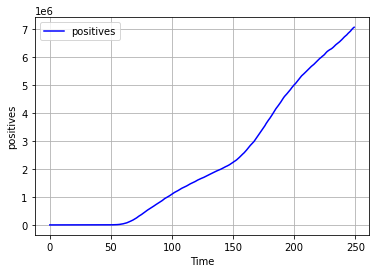

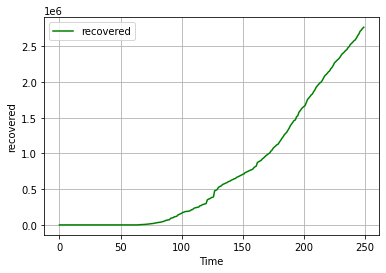

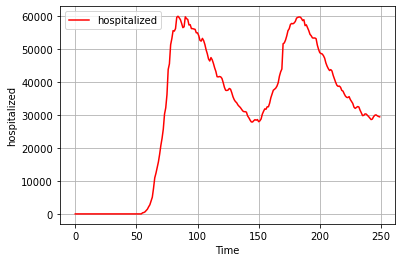

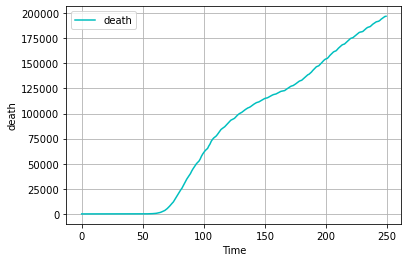

In [68]:
# Plotear los datos que tenemos individualmente para poder analizar cada uno por separado
color_index = 0
colors = "bgrcmykw"
# plotear cada uno
for i in range(len([c for c in clean_data])):
    plt.plot(clean_data.iloc[:,i],label = [c for c in clean_data][i], c = colors[color_index])
    color_index += 1
    plt.xlabel('Time')
    plt.ylabel([c for c in clean_data][i])
    plt.legend()
    plt.grid()
    plt.show()

In [49]:
# comentar las graficas

## <center> <font color='navy'> Simulacion de Montecarlo <center> <font color='navy'>

Pasos para la simulacion de datos

- Estimar f
- Aplicar metodos de generacion de variables aleatorias
    * Aplicar tecnicas de reduccion de varianza
* Obtener distribucion de probabilidad
* Aplicar Montecarlo


## Simulacion para escenario 1: **Positivos**

In [69]:
# nombrar variable que contenga datos del df determinados
positivos = clean_data['positives']

In [72]:
# Importar funcion de distribucion de kernel
from sklearn.neighbors import KernelDensity
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

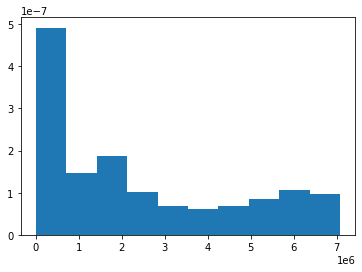

In [86]:
y_, x_, _ =plt.hist(positivos, density = True)

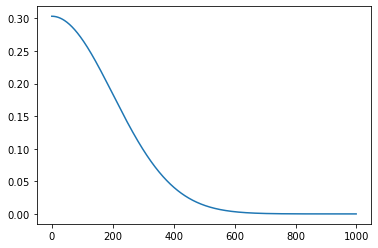

In [90]:
x_grid = np.arange(0,1,0.001)
plt.plot(kde_sklearn(positivos,x_grid))

Al claramente notar que la distribucion de arriba es exponencial, tanto por el metodo del kernel que por la visualizacion del histograma procedemos a aplicar los metodos para generar variables aleatorias.

### Metodo de la transformada inversa

Entonces, al ser una distribucion exponencial, opcionemos las siguientes ecuaciones

    
$$f(x)=\begin{cases}\ \lambda e^{-\lambda x}, 0 \leq x \\ 0, otro caso \end{cases}$$ 

$$F(x)=\begin{cases}\ 1 - e^{-\lambda x}, 0 \leq x \\ 0, otro caso \end{cases}$$ 

$$E[x] = \frac{1}{\lambda}$$

Al necesitar el parametro lambda, y teniendo la esperanza de los datos, despejamos para encontrar lambda:

$$ \lambda = \frac{1}{E[x] }$$

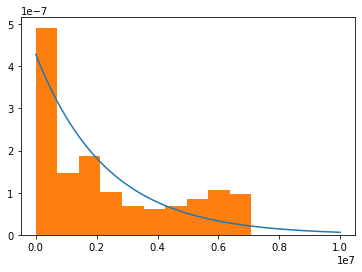

In [142]:
l = 1/(positivos.mean()) # definir lambda, E(x) = 1/lambda, y despejamos

# plotear la funcion de lambda con la l definida
f = lambda x: l*np.exp(-l*x)
x = np.arange(0,10**7, 1)
plt.plot(x,f(x))
# Plotear histograma
plt.hist(positivos, density = True);

Asi encontramos que efectivamente las variables que se tienen distribuyen como f(x), asi que aplicamos el metodo de la transformada inversa a F(x) y procedemos a generar variables aleatorias 
$$F(x) = 1 - e^{-\lambda x}$$
$$U = 1 - e^{-\lambda x}$$
$$-\frac{ln(1-U)}{\lambda} = x$$

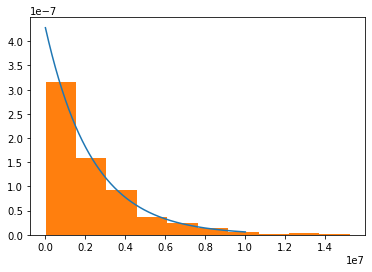

La media obtenida por montecarlo crudo del numero de positivos es de 2349768.9421611717


In [121]:
# Metodo de Montecarlo crudo
N = 10**3
F_inv_positivos = lambda u: -np.log(1-u)/l

u = np.random.uniform(0,1,N)
var_aleatorias_crudo = F_inv_positivos(u) # variables aleatorias

plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_crudo, density = True);
plt.show()

media_crudo_positivos = var_aleatorias_crudo.mean()

print('La media obtenida por montecarlo crudo del numero de positivos es de', media_crudo_positivos)

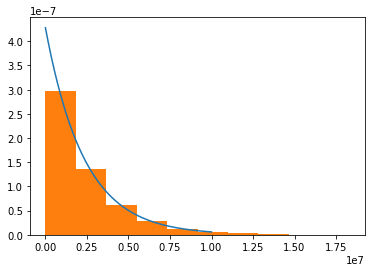

La media obtenida por metodo estratificado igualmente espaciado del numero de positivos es de 2335898.276314391


In [122]:
# Metodo estratificado para disminucion de varianza

def estra_igualmente_espaciado(B: 'Numero de variables aleatorias a generar'):
    """
    Funcion que genera B variables aleatorias igualmente espaciadas
    """
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    estra = (U2+i)/B
    return estra

# Aplicar metodo estratificado

u = estra_igualmente_espaciado(N)

var_aleatorias_estra = F_inv_positivos(u) # variables aleatorias

plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_estra, density = True);
plt.show()

media_stra_positivos = var_aleatorias_estra.mean()

print('La media obtenida por metodo estratificado igualmente espaciado del numero de positivos es de', media_stra_positivos)


### Metodo de aceptacion rechazo

Procedemos a encontrar la pdf de los datos con kde y aplicar el metodo de aceptacion rechazo

In [140]:
#funcion para retornar funcion con kde 
def kde_sklearn_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis]))
    return pdf


# dist
f_positivos = kde_sklearn_f(positivos)
f_positivos

<function __main__.kde_sklearn_f.<locals>.<lambda>(x_grid)>

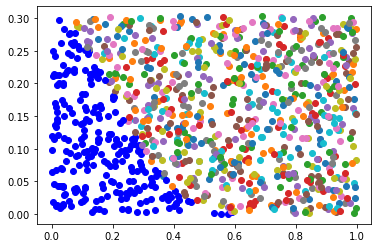

In [162]:
# Metodo de aceptacion rechazo
def acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    
    va = [R1[i] for i in range(len(R1)) if condition[i]] 
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]          
    plt.show()
    return va
    


max_f = f_positivos(optimize.fmin(lambda x:-f_positivos(x),0,disp=False))# Encontrar el maximo de la funcion
N = 10**3 # Definir N
t = lambda x: max_f * np.ones(len(x)) # definir t con el maximo

R2 = np.random.rand(N)
R1 = np.random.uniform(0,1,N)

var_aleatorias_acep = acep_rechazo(R2,R1,f_positivos,t)


In [1]:
np.array(var_aleatorias_acep)

NameError: name 'np' is not defined

## Modelo que prediga el numero de positivos en el futuro.

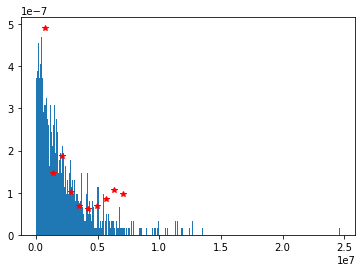

In [114]:
loc, scale = st.expon.fit(positivos)

y_random = st.expon.rvs(loc=loc, scale=scale, size=1000)

plt.plot(x_[1:], y_, 'r*')
y1, x1, _ = plt.hist(y_random, bins=400, density = True)


In [115]:
escenarios, fecha_futura = 1000000, 7

y_random = st.expon.rvs(loc=loc, scale=scale, size=[escenarios, fecha_futura])
dia = 1
y_random.mean(axis=0).cumsum()[dia-1]

2334817.35853217

## Simulacion para escenario 2: **Hospitalizados**

## Simulacion para escenario 3: **Recuperados**

## Simulacion para escenario 4: **Muertos**

## <center> <font color='navy'> Conclusion <center> <font color='navy'>